# Restaurant_Rating_Prediction Project

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
print('StandardImport Completed')

StandardImport Completed


## Data Reading

In [2]:
mydata = pd.read_csv(r"E:\\Data Science Projects Data\\Restaurant_Rating_Prediction\\zomato.csv");
print("Shape of the data : ",mydata.shape)

Shape of the data :  (51717, 17)


In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
mydata.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
# Checking Missing Value in percentage
((mydata.isnull().sum())/len(mydata))*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

# EDA & Data Prepration

In [6]:
mydata.rename(columns={'listed_in(city)':'city'},inplace=True)
mydata.rename(columns={'listed_in(type)':'type'},inplace=True)

In [7]:
print("Total Locations : ",mydata.location.nunique())
print("Total Citys : ",mydata.city.nunique())

Total Locations :  93
Total Citys :  30


In [8]:
mydata.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
print("Total Null values in rate : ",mydata.rate.isnull().sum())

Total Null values in rate :  7775


In [10]:
mydata.rate = mydata.rate.str.split('/',expand=True)[0]
mydata.rate = mydata.rate.fillna(3.7)
mydata.loc[mydata['rate'] == 'NEW',['rate']] = 3.7
mydata.loc[mydata['rate'] == '-',['rate']] = 3.7
mydata.rate = mydata.rate.astype('float64')

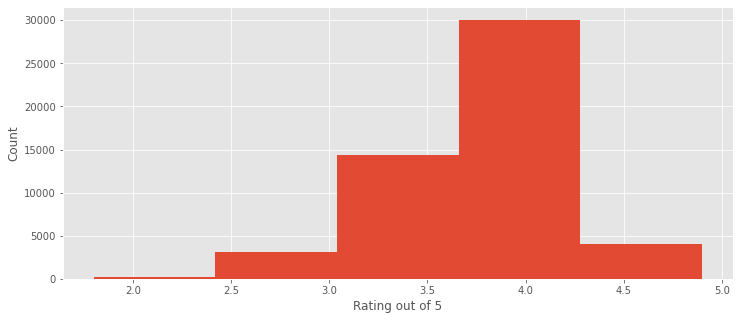

In [11]:
plt.rcParams["figure.figsize"] = (12,5)
mydata.rate.plot.hist(bins=5)
plt.xlabel("Rating out of 5")
plt.ylabel("Count")
plt.show()

C:\Users\snand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\snand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_table', ylabel='count'>

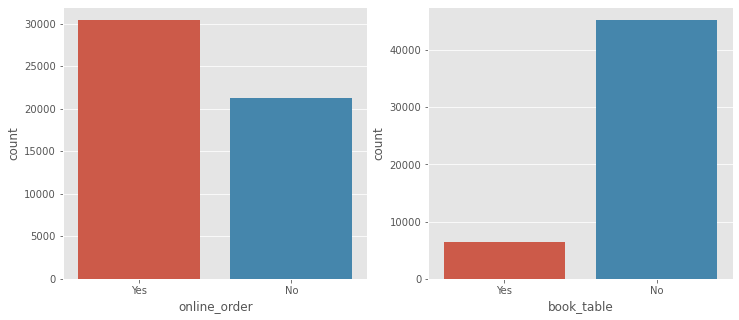

In [12]:
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
sns.countplot(mydata.online_order)


plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,2)
sns.countplot(mydata.book_table)

In [13]:
mydata.groupby('book_table').agg({'rate':'mean',
                                'votes':'mean'})

,rate,votes
book_table,,
No,3.638656,160.690664
Yes,4.133494,1147.129788


In [14]:
mydata.groupby('online_order').agg({'rate':'mean',
                                'votes':'mean'})

,rate,votes
online_order,,
No,3.672181,250.31594
Yes,3.720053,307.02319


<AxesSubplot:xlabel='rate', ylabel='votes'>

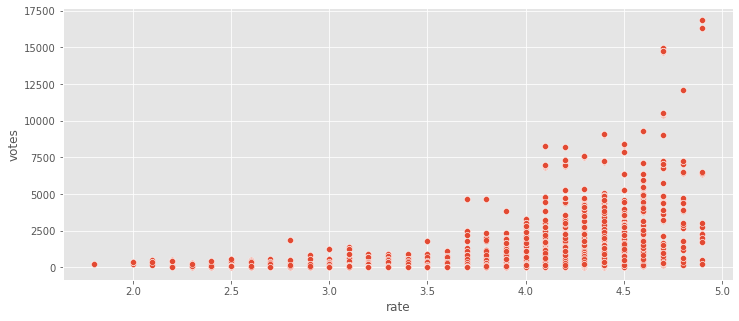

In [15]:
sns.scatterplot(data=mydata,x='rate',y='votes')

In [16]:
mydata.phone.isnull().sum()

1208

In [18]:
mydata.phone.fillna(value='0',inplace=True)